In [103]:
from functions_week3 import overlap
from functions import read_q

In [2]:
import itertools
from itertools import permutations

In [3]:
def scs(str_list,k):
    reference_string=''.join(str_list)
    ss_set=[]
    count=0
    for strings in permutations(str_list):
        count_overlap=0
        final_str=strings[0]  #Basically, at the end, we are appending the overlap value of the second string to the final_str. Hence, if any 'strings' is not considered as the second string in overlap() e.g. first string in the permutation set, it will not be updated in the final string 
        for i in range(len(str_list)-k):
            oval=overlap(strings[i],strings[i+1],k)
            final_str+=strings[i+1][oval:]
            count_overlap+=1
        ss_set.append(final_str)
        if len(final_str)<len(reference_string):
            reference_string=final_str
        count+=1
    count_incidence=0
    for ss in ss_set:
        if len(ss)==len(reference_string):
            count_incidence+=1
    return reference_string,count_incidence,ss_set
    

In [4]:
ssc, count,overlap_cnt=scs(['ACGGTACGAGC','GAGCTTCCGA','GACACGG'],1)

In [5]:
print('The shortest common superstring is:',ssc)
print('The length of the shortest common superstring is:',len(ssc))
print('The sequences with scs is:', count)

The shortest common superstring is: GACACGGTACGAGCTTCCGA
The length of the shortest common superstring is: 20
The sequences with scs is: 1


In [6]:
def get_maximal_overlap(str_list,k): #implementation based on lecture. Need to try dictionary approach
    best_olen=0
    best_a,best_b='',''
    for a,b in permutations(str_list,2):
        oval=overlap(a,b,k)
        if oval>best_olen:
            best_a, best_b, best_olen= a,b,oval
    return best_a, best_b, best_olen

In [7]:
def greedy_scs(str_list,k):
    a,b,olen=get_maximal_overlap(str_list,k)
    while olen>0:
        str_list.remove(a)
        str_list.remove(b)
        str_list.append(a+b[olen:])
        a,b,olen=get_maximal_overlap(str_list,k)
    if len(str_list)>1:
        return str_list
    else:
        return ''.join(str_list)

In [8]:
greedy_scs(['ACGGTACGAGC','GAGCTTCCGA','GACACGG'],2)

'GACACGGTACGAGCTTCCGA'

In [9]:
greedy_scs(['ACGGTACGAGC','GAGCTTCCGA','GACACGG'],2)

'GACACGGTACGAGCTTCCGA'

In [10]:
list1=['abc','xyz','mno']
print(list(itertools.permutations(list1)))
for it in permutations(list1):
    print(it[0])

[('abc', 'xyz', 'mno'), ('abc', 'mno', 'xyz'), ('xyz', 'abc', 'mno'), ('xyz', 'mno', 'abc'), ('mno', 'abc', 'xyz'), ('mno', 'xyz', 'abc')]
abc
abc
xyz
xyz
mno
mno


In [11]:
def visualize_de_b(st,k):
    nodes,edges=get_db(st,k) #Need to implement this function separately
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str+=' % s [label="%s"] ; \n' % (node, node)
    for src,dst in edges:
        dot_str+=' %s->%s; \n' % (src,dst)
    return dot_str + '}\n' 

In [12]:
def get_db(st,k):
    edges=[]
    nodes=set()
    for i in range(len(st)-k+1):
        edges.append((st[i:i+k-1],st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes,edges

In [13]:
nodes,edges=get_db('ACGCGTCG',3)
print(nodes)
print(edges)

{'GC', 'AC', 'GT', 'CG', 'TC'}
[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


In [14]:
print(visualize_de_b('ACGCGTCG',3))

digraph "DeBruijn graph" {
 GC [label="GC"] ; 
 AC [label="AC"] ; 
 GT [label="GT"] ; 
 CG [label="CG"] ; 
 TC [label="TC"] ; 
 AC->CG; 
 CG->GC; 
 GC->CG; 
 CG->GT; 
 GT->TC; 
 TC->CG; 
}



<b>Instructions to install gvmagic at: https://libraries.io/pypi/gvmagic</b>

In [15]:
%load_ext gvmagic

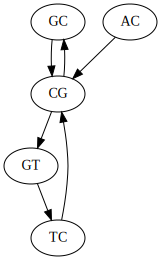

In [16]:
%dotstr visualize_de_b('ACGCGTCG',3) #Installation instructions of dotstr from here: https://stackoverflow.com/a/53560595

In [23]:
from collections import defaultdict

In [24]:
def fast_overlap(reads,kmer=6,minlength=3):
    count=0
    max_olen=0
    max_a,max_b='',''
    dict_kmers=defaultdict(set)
    for read in reads:
        for t in range(len(read)-kmer+1):
            dict_kmers[read[t:t+kmer]].add(read)
 #This is a dictionary with key=kmer and value=entire read
    overlap_dict=defaultdict(set)
    for read in reads:
        suffs=read[-kmer:] #Get the last kmer/ suffix of length k from the read
        read_suffs=dict_kmers[suffs] #Get all the reads that have this suffix somewhere in their list
        for suff in read_suffs: 
            if read!=suff:#If the original read is not equal to the current read selected:
                olen=overlap(read,suff,minlength)
                if olen>max_olen:
                    max_a=read
                    max_b=suff
                    max_olen=olen
    return max_a, max_b, max_olen

In [45]:
def fast_greedy(str_list,k=3):
    a,b,olen=fast_overlap(str_list,k)
    i=0
    while olen>0:
        print('\ri {}'.format(i), end="")
        str_list.remove(a)
        str_list.remove(b)
        str_list.append(a+b[olen:])
        a,b,olen=fast_overlap(str_list,k)
        i+=1
    if len(str_list)==1:
        return str_list
    else:
        return ''.join(str_list)